In [59]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

adata = sc.read_csv('noise_dropout_0.1.csv')

In [60]:
print(adata)
print("-----------------------")
print(adata.obs.head()) #cells
print("-----------------------")
print(adata.var.head()) #genes

AnnData object with n_obs × n_vars = 2001 × 10000
-----------------------
Empty DataFrame
Columns: []
Index: [, X1, X2, X3, X4]
-----------------------
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [61]:
#quality control og filter
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.pp.filter_genes(adata, min_cells=3)

In [62]:
print(adata)
print("-----------------------")
print(adata.obs.head()) #cells
print("-----------------------")
print(adata.var.head()) #genes

AnnData object with n_obs × n_vars = 2001 × 10000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
-----------------------
    n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
                10000                 9.210440    50005000.0   
X1               9747                 9.184817      381533.0   
X2               9752                 9.185330      150347.0   
X3               9884                 9.198774      402507.0   
X4               1275                 7.151485        2904.0   

    log1p_total_counts  pct_counts_in_top_50_genes  \
             17.727634                    0.997450   
X1           12.851955                    2.135857   
X2           11.920708 

In [70]:
#normalize og log transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata) #mange 0er

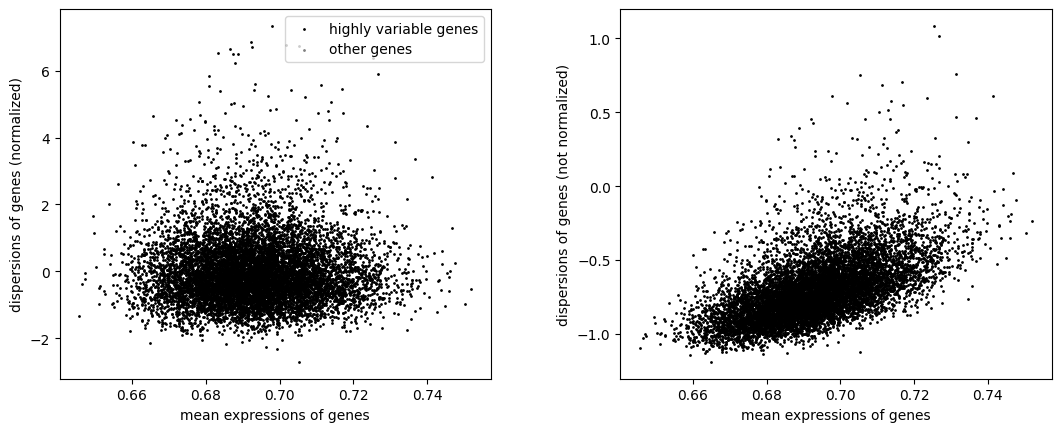

In [71]:
#find highly variable genes, som betyder at de har en stor varians og derfor er interessante
sc.pp.highly_variable_genes(adata, n_top_genes=10000) #subset=True if want only top 500 genes for UMAP
sc.pl.highly_variable_genes(adata)

In [72]:
print(adata)

AnnData object with n_obs × n_vars = 2001 × 10000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [73]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

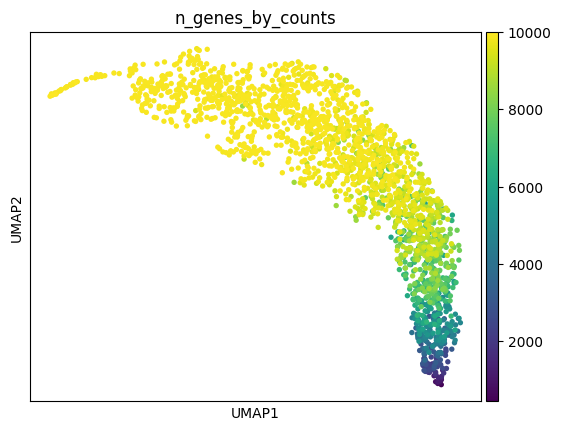

In [74]:
sc.pl.umap(adata, color='n_genes_by_counts')